#1. https://python-forum.io/Thread-Extract-of-matrix-subpart-using-a-deep-copy

In [ ]:
import numpy as np
 
A = np.random.randint(10, size = (100,10), dtype = np.int);
index = np.where(A[:,0] == 1);
print(np.array(index).shape)
Extract_trial1 = np.copy(A[index,:]); del index;
Extract_trial2 = np.copy(A);
index = np.where(A[:,0] != 1);
print(index)
Extract_trial2 = np.delete(Extract_trial2,index,axis=0);

In case of `Extract_trial1`, when you invoke `A[index, :]` it triggers advanced indexing of Numpy.
You can read about advanced indexing [here](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).
Adv. indexing always returns a copy of the data, so using `np.copy` is redundant here. Anvanced indexing
is triggered because you pass an array of integers to `A[...]`. 

From official docs:

Advanced indexing is triggered when the selection object, obj, is a non-tuple sequence object, an ndarray (of data type integer or bool), or a tuple with at least one sequence object or ndarray (of data type integer or bool).

You can inspect this by printing shape of the index variable (it is randomly chanched between runs):

index = np.where(A[:,0] == 1)
print(np.array(index).shape)

Lets look at the advanced indexing broadcasting formula:

result[i_1, ..., i_M] == x[ind_1[i_1, ..., i_M], ind_2[i_1, ..., i_M], ..., ind_N[i_1, ..., i_M]]

`ind_1` is your index variable, (`ind_2` = ':' in your case, that is simple indexing); `ind_1` has shape `(1, small random integer)`, so result shape will be `(1, small_random_integer, 10)`. This is what you have regarding `Extract_trial1`.

You can try the following examples:

 A[[1,2,3], :] => shape = (3, 10)
 A[[[1,2,3],], :] => shape (1, 3, 10)
 A[[[[1,2,3],]], :] => shape (1, 1, 3, 10)

To fix this behavior you need to pass `1d` array of indices to `A[...]`, i.e. `A[index[0], :]`.

#2. https://python-forum.io/Thread-multi-dimm-array-dynamic

In [ ]:
howmany = 6
rulenumber = 0
my_2d_list = [[]]
 
for rulenumber in range(1, howmany * howmany + 1):
    print(rulenumber)
    if (rulenumber % 2 == 0):
        my_2d_list[-1].append('even')
    else:
        my_2d_list[-1].append('odd')
    if (rulenumber % 3 == 0):
        my_2d_list[-1].append('div by 3')
    else:
        my_2d_list[-1].append('not by 3')
    my_2d_list.append(list())

#3. https://python-forum.io/Thread-graphing-euler-method

In [ ]:
%matplotlib qt

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def volterra(P, K=1, r=1):
    return r * P * (1 - P / K)

def euler(fun, Po, h, N, **kwargs):
    acc = [Po]
    times = np.cumsum(np.r_[0, np.ones(N) * h])
    for _ in range(N):
        acc.append(acc[-1] + h * fun(acc[-1], K=K, r=r))  # for autonomous system's only
    return np.array(acc), times

K = 12
r = 0.43
Po = 1
N = 30;
step_values = [1, 0.5, 0.1]
fig = plt.figure()
ax = fig.add_subplot(111)
for h, c in zip(step_values, 'rgb'):
    Ps, Ts = euler(volterra, Po, h, N, K=K, r=r)
    ax.plot(Ts, Ps, c)

plt.show( )   


#4. https://python-forum.io/Thread-How-to-graphically-represent-this-function

In [ ]:
from math import exp, log, sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5
 
def CON_call_price(spot,strike,tau,sigma,r,q,phi,x):
    d1 = (log(spot/strike)+(r-q+0.5*sigma**2)*tau)/(sigma*sqrt(tau))
    d2 = (d1-sigma*sqrt(tau))
     
    y = x*exp(-r*tau)*norm.cdf(d2)
     
    return y
 
    P = list(map(lambda x:  x if spot > strike else 0))
    return P
 
S = [t/5 for t in range(0,1000)] 
 
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize = (20,15))
fig.suptitle('Payoff Function for CON CALL', fontsize=20, fontweight='bold')
 
bc_P = [CON_call_price(120,100, 1, 0.25, 0.2, 0.03, 1, s) for s in S]
plt.subplot(222)
plt.plot(S, bc_P, 'b')
plt.legend(["Binary Call"])
 
plt.show()

#5. https://python-forum.io/Thread-Pandas-fillna-based-on-conditions

In [ ]:
import pandas as pd
import numpy as np
 
data = [['Rabbit', 2, 2],
    ['Dog', 5, 5.5],
    ['Dog', 3, 2.8],
    ['Cat', np.nan, np.nan],
    ['Cat', np.nan, np.nan],]
 
df = pd.DataFrame(columns=["Type", "Weight_April", "Weight_May"], data=data)

In [ ]:
df.loc[df.Type=='Cat', ["Weight_April", "Weight_May"]] = df.loc[df.Type == 'Dog', ["Weight_April", "Weight_May"]].values

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
def read_names():
    for name in [1,2,3]:
        yield name

In [ ]:
names = read_names()

In [ ]:
next(names)

#6. https://python-forum.io/Thread-Coditional-colormaps-plotting

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
A, B, C = np.random.rand(72,144), np.random.rand(72,144), np.random.rand(72,144)
rgb_image = np.zeros(A.shape + (3,))
rgb_image[..., 0] = ((A > 0.5) & (B > 0.5) & (C > 0.5)).astype(int) # red channel
rgb_image[..., 2] = ((A > 0.5)).astype(int)   # blue channel

In [ ]:
plt.imshow(rgb_image)

#7. https://python-forum.io/Thread-Sort-Matrices-by-Mean-Value-Obtained-OpenCV-Python-and-Numpy

In [151]:
np.array([np.random.rand(3,3), np.random.rand(3,3)]).reshape(-1, 2).mean(axis=0)

array([0.60706827, 0.45797937])

In [153]:
np.array([np.random.rand(3,3), np.random.rand(3,3)])[[1,0]].tolist()

[[[0.8460485253964698, 0.12973309191025761, 0.38179778641946815],
  [0.7591534699981184, 0.5177203017239596, 0.09442190119121041],
  [0.18716544093863252, 0.3560585762527657, 0.7828422193248094]],
 [[0.276665663235768, 0.2493974247807642, 0.8191880788358641],
  [0.9287695044476365, 0.6913381411101959, 0.803697500844096],
  [0.22022584709986126, 0.9628612289178343, 0.7372697277575267]]]

#8. https://python-forum.io/Thread-Keras-Target-Problem

In [15]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.utils import to_categorical

In [ ]:
trainX = np.random.rand(897, 5, 1980)
trainX = trainX.reshape(897, -1)
trainY = np.random.choice([0,1], size=897)[:, np.newaxis]
model = Sequential()
model.add(Dense(1024, input_shape=(5*1980,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(1, activation="softmax"))

INIT_LR = 0.01
EPOCHS = 75
  
opt = SGD(lr=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])
model.summary() 

H = model.fit(trainX, trainY, validation_data=None,
    epochs=EPOCHS, batch_size=64)

#9. https://python-forum.io/Thread-Plot-Line-chart-based-on-the-input

In [ ]:
from pylab import *
Salesamount = [[28000.00,308000.00,582000.00,387000.00],[367000.00,3037000.00,4822000.00,2936000.00],[637000.00,3440000.00,4415000.00,3294000.00],[478000.00,1209000.00,478000.00,1209000.00]]
CalendarYear = [2010,2011,2012,2013]
Employee = [272,281,282,296]
fig = plt.figure()
ax = fig.add_subplot(111)
for y, c in zip(Salesamount, 'rgbk'):
    ax.plot(CalendarYear, y, c)
plt.show()

#10. https://python-forum.io/Thread-scipy-curve-fit-for-multiple-independent-variables?pid=79744#pid79744

In [6]:
import matplotlib
import os,sys, math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from scipy import optimize
from scipy.optimize import curve_fit, least_squares
 
xdata = [214.737191559, -5.64912101538e-36, 36.1372453686, 189.459700978, 233.562136902, 201.230228832, -5.59364882619e-36, -36.3232002416, -188.192199081, -212.837139143, -232.342545403, -200.699429716]
ydata = [-5.88273617837e-37, -211.536123799, -186.67108047, -35.9497006815, 200.282998159, 232.085860035, 213.44274878, 187.945919272, 35.7227474297, -6.00785257974e-37, -199.746844708, -230.856058666]
 
xdata = np.array(xdata)
ydata = np.array(ydata)
X = (xdata, ydata)
def func1(Z):
    x,y = X
    a, b, c = Z  
#     x = np.array(X[0])
#     y = np.array(X[1])
     
    n  = 8
#     % A  = ydata
#     % B  = -xdata
#     % C  = xdata. - ydata
#     % H  = zdata
     
    g = np.subtract(x,y)
    I_0 = np.subtract(x,y)   # x-y = C
    I_1 = np.multiply(I_0,c) # c(x-y) = cC
    I_2 = np.multiply(b,-x)   #b(-x) = bB
    I_3 = np.multiply(a,y)  # aA
     
     
    I3_0 = np.subtract(I_1,I_2) # cC-bB
    I3_1 = np.subtract(I_3,I_1) # aA-cC
    I3_2 = np.subtract(I_2,I_3) # bB-aA
     
    I3_00 = np.multiply(I3_0,I3_1) # (cC-bB)(aA-cC)
    I3_01 = np.multiply(I3_00,I3_2) # (cC-bB)(aA-cC)(bB-aA)
     
    I3 = np.divide(I3_01,54) # (cC-bB)(aA-cC)(bB-aA)/54
     
    I2_0 = np.power((I3_1),2)  # (aA-cC)^2
    I2_1 = np.power((I3_0),2)  # (cC-bB)^2
    I2_2 = np.power((I3_2),2)  # (bB-aA)^2
     
    I2_00 = np.add(I2_0,I2_1)  # (aA-cC)^2 + (cC-bB)^2
    I2_01 = np.add(I2_00,I2_2) # (aA-cC)^2 + (cC-bB)^2 + (bB-aA)^2
     
    I2 = np.divide(I2_01,54)  # ((aA-cC)^2 + (cC-bB)^2 + (bB-aA)^2)/54
     
    th_0 = np.divide(I3,(np.power(I2,(3/2))))  # I3/(I2^(3/2))
     
#     print(th_0)
     
    th = np.arccos(np.clip((th_0),-1,1))  # arccos(I3/(I2^(3/2)))
     
#     print(th)
     
    ans_0 = np.divide(np.add((2*th),(np.pi)),6)   # (2*th + pi)/6
    ans_1 = np.divide(np.add((2*th),(3*np.pi)),6) # (2*th + 3*pi)/6
    ans_2 = np.divide(np.add((2*th),(5*np.pi)),6) # (2*th + 5*pi)/6
     
    ans_00 = np.multiply(np.cos(ans_0),2)  # 2*cos((2*th + pi)/6)
    ans_11 = np.multiply(np.cos(ans_1),2)  # 2*cos((2*th + 3*pi)/6)
    ans_22 = np.multiply(np.cos(ans_2),2)  # 2*cos((2*th + 5*pi)/6)
     
    ans_000 = np.power(np.absolute(ans_00),n)  # (abs(2*cos((2*th + pi)/6)))^n
    ans_111 = np.power(np.absolute(ans_11),n)  # (abs(2*cos((2*th + 3*pi)/6)))^n
    ans_222 = np.power(np.absolute(ans_22),n)  # (abs(2*cos((2*th + 5*pi)/6)))^n
     
    ans_0000 = np.add((np.power(np.absolute(ans_00),n)),(np.power(np.absolute(ans_11),n))) # (abs(2*cos((2*th + pi)/6)))^n + (abs(2*cos((2*th + 3*pi)/6)))^n 
    ans_1111 = np.add((ans_0000),(np.power(np.absolute(ans_22),n)))  # (abs(2*cos((2*th + pi)/6)))^n + (abs(2*cos((2*th + 3*pi)/6)))^n + (abs(2*cos((2*th + 5*pi)/6)))^n
     
    sna_0 = np.power(np.multiply(3,I2),(n/2))  # (3*I2)^(n/2) !!
    sna_1 = 2*(np.power(190,n)) # 2*(sigma^n) !!
     
    sna_00 = np.multiply(sna_0,ans_1111)
    sna_11 = np.subtract(sna_00,sna_1)
     
    return sna_11 - y
 
# initial guesses for a,b,c:
a, b, c = 1, 2, 3
p0      = np.array([a, b, c])
popt = least_squares(func1, p0)
print(popt)

11. https://python-forum.io/Thread-How-to-plot-implicit-functions-with-two-variables-in-scipy-python-using-matplotlib

In [9]:
from pylab import *
from scipy.optimize import least_squares
xdata = [0.3063191028,-0.0156344344,-0.0155750443,-0.7206687321,-0.7473645659,-0.9174428618,-0.8839320182,-1.0399645639,-0.9997277955,-1.0157928079,-0.9888297188,-0.4533985964,0.0091163748,0.0026577054,0.5926386016,0.5992457462,1.004345373,0.9909529136,1.0392221881,1.0405287695,1.0606471537,1.0283835014,1.0149316519,0.9416591604,0.9685628594,0.9155869223,0.9088016075,0.6344640542,0.6142268898]
ydata = [1.1154790304,0.9978867036,1.0111900779,0.5702040049,0.5903372366,-0.0072010453,-0.0007720708,-0.45206232,-0.4390262009,-1.0375889614,-0.9978570085,-1.0612855969,-0.957932038,-0.904673998,-0.7489532501,-0.7689528542,-0.0266364437,-0.0265473586,0.2857701407,0.5784443763,0.5849624358,0.8579043226,0.8446900334,0.9316519346,0.9580805131,1.091470597,1.071560078,1.1199481327,1.0868233245]
xdata = np.array(xdata)
ydata = np.array(ydata)
 
def func1(coeff,x,y):
#     x = X[0]
#     y = X[1]
 
    n  = 8
#     % A  = ydata
#     % B  = -xdata
#     % C  = xdata. - ydata
#     % H  = zdata
 
    g = np.subtract(x,y)
    I_0 = np.subtract(x,y)   # x-y = C
    I_1 = np.multiply(I_0,coeff[2]) # c(x-y) = cC
    I_2 = np.multiply(coeff[1],-x)   #b(-x) = bB
    I_3 = np.multiply(coeff[0],y)  # aA
 
 
    I3_0 = np.subtract(I_1,I_2) # cC-bB
    I3_1 = np.subtract(I_3,I_1) # aA-cC
    I3_2 = np.subtract(I_2,I_3) # bB-aA
 
    I3_00 = np.multiply(I3_0,I3_1) # (cC-bB)(aA-cC)
    I3_01 = np.multiply(I3_00,I3_2) # (cC-bB)(aA-cC)(bB-aA)
 
    I3 = np.divide(I3_01,54) # (cC-bB)(aA-cC)(bB-aA)/54
 
    I2_0 = np.power((I3_1),2)  # (aA-cC)^2
    I2_1 = np.power((I3_0),2)  # (cC-bB)^2
    I2_2 = np.power((I3_2),2)  # (bB-aA)^2
 
    I2_00 = np.add(I2_0,I2_1)  # (aA-cC)^2 + (cC-bB)^2
    I2_01 = np.add(I2_00,I2_2) # (aA-cC)^2 + (cC-bB)^2 + (bB-aA)^2
 
    I2 = np.divide(I2_01,54)  # ((aA-cC)^2 + (cC-bB)^2 + (bB-aA)^2)/54
 
    th_0 = np.divide(I3,(np.power(I2,(3/2))))  # I3/(I2^(3/2))
 
#     print(th_0)
 
    th = np.arccos(np.clip((th_0),-1,1))  # arccos(I3/(I2^(3/2)))
 
#     print(th)
 
    ans_0 = np.divide(np.add((2*th),(np.pi)),6)   # (2*th + pi)/6
    ans_1 = np.divide(np.add((2*th),(3*np.pi)),6) # (2*th + 3*pi)/6
    ans_2 = np.divide(np.add((2*th),(5*np.pi)),6) # (2*th + 5*pi)/6
 
    ans_00 = np.multiply(np.cos(ans_0),2)  # 2*cos((2*th + pi)/6)
    ans_11 = np.multiply(np.cos(ans_1),2)  # 2*cos((2*th + 3*pi)/6)
    ans_22 = np.multiply(np.cos(ans_2),2)  # 2*cos((2*th + 5*pi)/6)
 
    ans_000 = np.power(np.absolute(ans_00),n)  # (abs(2*cos((2*th + pi)/6)))^n
    ans_111 = np.power(np.absolute(ans_11),n)  # (abs(2*cos((2*th + 3*pi)/6)))^n
    ans_222 = np.power(np.absolute(ans_22),n)  # (abs(2*cos((2*th + 5*pi)/6)))^n
 
    ans_0000 = np.add((np.power(np.absolute(ans_00),n)),(np.power(np.absolute(ans_11),n))) # (abs(2*cos((2*th + pi)/6)))^n + (abs(2*cos((2*th + 3*pi)/6)))^n 
    ans_1111 = np.add((ans_0000),(np.power(np.absolute(ans_22),n)))  # (abs(2*cos((2*th + pi)/6)))^n + (abs(2*cos((2*th + 3*pi)/6)))^n + (abs(2*cos((2*th + 5*pi)/6)))^n
 
    sna_0 = np.power(np.multiply(3,I2),(n/2))  # (3*I2)^(n/2) !!
    sna_1 = 2*(np.power(1.0167,n)) # 2*(sigma^n) !!
 
    sna_00 = np.multiply(sna_0,ans_1111)
    sna_11 = np.subtract(sna_00,sna_1)
 
    return sna_11
x0 = np.array([1.0, 1.0, 1.0])
res_lsq = least_squares(func1, x0,loss='cauchy',f_scale=0.001,args=(xdata, ydata))
res_lsq.x

array([1.0040317 , 1.00612712, 0.99137764])

In [65]:
xmin, xmax, ymin, ymax = xdata.min(), xdata.max(), ydata.min(), ydata.max()
g = lambda x, y: func1(res_lsq.x, x, y)**2
X, Y = np.meshgrid(np.linspace(xmin-0.2, xmax+0.2, 1000), np.linspace(ymin-0.2, ymax+0.2, 1000))
Z = g(X, Y)
plt.contourf(X, Y, np.log(Z), levels=[-10,-8])
plt.gca().scatter(xdata, ydata)
plt.colorbar()
plt.show()

#12. https://python-forum.io/Thread-NumPy-and-List

In [151]:
import numpy as np
x = np.array(['a']*10**5)
y = ['a']*10**5

In [152]:
%timeit -n 10000 np.append(x, '2') 

126 µs ± 6.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [153]:
%timeit -n 10000 y.append('2')

121 ns ± 47.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#13. https://python-forum.io/Thread-Keras-Matplotlib-causing-crash

In [ ]:
# setup
from keras.datasets import imdb
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=1000)
 
import numpy as np
 
import matplotlib.pyplot as plt
 
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
 
# check training data
train_data[0]
 
# check training labels
train_labels[0]
 
# test that maximum number of unique words is 10000
max([max(sequence) for sequence in train_data])
 
# read original reviews for kicks
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[950]])
decoded_review
 
def vectorise_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
 
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)
 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
 
# view the transformed samples
x_train[0]
 
# view the labels
y_train[0]
 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=['acc'])
 
 
# set up a validation set
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]
 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
 
# epochs = list(range(1, len('acc') + 1))  #  This line contained a mistake
epochs = list(range(1, len(history_dict['acc']) + 1))  # s
 
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

#14. https://python-forum.io/Thread-Cherrypy-no-response-to-requests

In [21]:
python -m http.server 2020 --bind 127.0.0.1

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


#15. https://python-forum.io/Thread-Coditional-colormaps-plotting

I didn't analyze that, but lets suppose that your conditions don't become true simultaneously; In case of using multiple colors the approach should be slightly different.

In [16]:
COLORS = {'red': [1, 0, 0],  # may be you need to scale values to 255... e.g. red = [255, 0, 0];
          'blue': [0, 0, 1],
          'green': [0, 1, 0],
          'gray' : [0.5, 0.5, 0.5],
    #     ...  define your colors here, 
}
 
rgb_image = np.zeros(A.shape + (3, ))
rgb_image[(CFAS505>0.5) & (CFAS5095>0.5) & (CFAS595>0.5), :] = COLORS['red']
rgb_image[((CFAS505>0.5) &(CFAS5095<0.5) & (CFAS595<0.5)), :] = COLORS['gray']
# do the same with all conditions and choose appropriate color
...

#16. https://python-forum.io/Thread-How-to-map-360-degree-angle-over-1024-counts

In [ ]:
def deg2count(angle, maxcount=1023):
    """ 0 <= angle <= 360 """
    return int(angle / 360.0 * maxcount)
 
def count2deg(count, maxcount=1023):
    return int(count / maxcount * 360)

I didn't work with raspberry pi and embedded
python, but I suspect that PIN_DAT = [3,14] should be PIN_DAT = [3.14], if 3,14 stands for pi here...?! 
Since your code includes series of numbers 3,1,4 (pi approx 3.14), I suspect that
angles should be given in radians; in this case my code should be changed, e.g. 360 must be replaced with, e.g. 3.1415.

#17. https://python-forum.io/Thread-Wrong-result-of-polyroots

In [1]:
import numpy.polynomial.polynomial as poly
import math
import cmath
 
def coefficients(k, ts, t1):
    z1 = complex(1-k*t1,0)
    z2 = complex(k*(ts+2*t1)-1-math.exp(-ts/t1),0)
    z3 = complex(math.exp(-ts/t1)-k*(t1+ts*math.exp(-ts/t1)),0)
    coeff = (z1,z2,z3)
    return coeff
 
coeff = coefficients(0, 0.3, 0.4)

In [11]:
[c.real for c in coeff]

[1.0, -1.4723665527410148, 0.47236655274101474]

In [3]:
coeff[1]**2 - 4*coeff[0]*coeff[2]

(0.2783970546664005+0j)

In [4]:
(-coeff[1]-cmath.sqrt(coeff[1]**2 - 4*coeff[0]*coeff[2]))/2/coeff[0]

(0.4723665527410147-0j)

In [12]:
roots = poly.polyroots([1.0, -1.4723665527410148, 0.47236655274101474])

In [13]:
roots

array([1.        , 2.11700002])

In [15]:
coeff[2]*roots[0]**2+coeff[1]*roots[0]+coeff[0]

(2.220446049250313e-16+0j)

In [32]:
import numpy as np

In [46]:
np.polynomial.polynomial.polycompanion(coeff)

array([[ 0.        +0.j, -2.11700002+0.j],
       [ 1.        +0.j,  3.11700002+0.j]])

#18. https://python-forum.io/Thread-How-to-convert-rows-to-columns

In [24]:
rows = [
'SOME',
'TEXT',
'OFSO',
'MELE',
'NGTH']

In [25]:
list(map(''.join, zip(*rows)))

['STOMN', 'OEFEG', 'MXSLT', 'ETOEH']

#19. https://python-forum.io/Thread-Help-rendering-a-pylab-plot

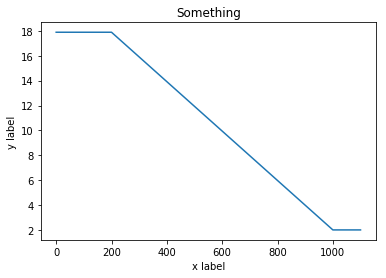

In [5]:
from pylab import *
 
# Returns the summer tterature of seawater (in degrees Celsius) according to Mackenzie’s model.
@np.vectorize
def some_function(ff, dd):
    if dd >=0 and dd <=200:
        tt = (22/-90)*ff+24
    elif dd >=200 and dd <=1000:
        st = (22/-90)*(ff)+24
        gg = (st-2)/-800
        tt = gg*dd+(gg*-1000+2)
    else:
        tt = 2.0
    return tt
 
ff = float(25)
dd = np.arange(0, 1200, 100)
tt1 = some_function(ff, dd)
plot(dd,tt1)
title("Something")
xlabel("x label")
ylabel("y label")
show()

#20 https://python-forum.io/Thread-Ellipsis

First of all, ellipsis is convenient triple of symbols (dots) to denote "something" when working with indexes. 
It is ususally used in NumPy to denote multiple dimensions, e.g. 
`x = np.array(np.arange(10000)).reshape(10, 10, 10, 10)` (x is array of shape 10x10x10x10, dim=4) `x[:, :, :, :5]` could be replaced with `x[..., :5]` (`x[..., 5].shape = (10, 10, 10, 5)`). So, ellipsis is useful when working with high dimensional data. 

You can define your own behavior of the Ellipsis symbol, this, I think, its primary purpose.

In [14]:
class Container:
    def __getitem__(self, index):
        if index is Ellipsis:
            print("This is ellipsis")
            return 0
        else:
            return index

In [15]:
c = Container()

In [16]:
c[...]
c[3]

This is ellipsis


3